In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
            [2.0, 4.0, 6.0, 8.0, 10.0, 12.0],
            [101.0, 201.0, 301.0, 401.0, 501.0, 601.0]])
# [101.0, 201.0, 301.0, 401.0, 501.0, 601.0]
y_train = np.array([4, 6, 8, 10, 12, 14])
#w = np.zeros(len(x_train[0]))
w=[1, 1, 1, 1, 1, 1]
print(x_train)
print(w)
b=10

[[  1.   2.   3.   4.   5.   6.]
 [  2.   4.   6.   8.  10.  12.]
 [101. 201. 301. 401. 501. 601.]]
[1, 1, 1, 1, 1, 1]


In [3]:
#feature scalling
m,n = x_train.shape
for i in range(m):
    for j in range(n):
        x_train[i][j] = x_train[i][j] / max(x_train[i])
print(x_train)

[[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]
 [0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]
 [0.16805324 0.3344426  0.50083195 0.6672213  0.83361065 1.        ]]


In [4]:
#calculating the formula
def myformula(x, w, b):
    f=np.dot(x, w) + b 
    return f
print(myformula(x_train, w, b))

[13.5        13.5        13.50415973]


In [5]:
#calculating cost function
def costfunc(x, y, w, b,):
    m = x.shape[0]
    error = 0
    add = 0
    for i in range(m):
        error = (myformula(x[i], w, b) - y[i])**2
        add = add + error
    J = (1 / (2 * m)) * add
    return J
print(costfunc(x_train, y_train, w, b))

29.46596239582209


In [6]:
#calculating gradient for 1 iter
def g(w, b, x, y):
    m,num = x.shape
    w_add = 0
    b_add = 0
    w_error = np.zeros((num,))
    for i in range(m):
        err = (myformula(x[i], w, b) - y[i])
        for n in range(num):
            w_error[n] = w_error[n] + (err*x[i,n])
            #w_add += w_error[i]
            
        b_error = (myformula(x[i], w, b) - y[i])
        b_add += b_error

    w_one_m = w_error / m
    b_one_m = b_add / m
    #w = w - (a*w_one_m)
    #b = b - (a*b_one_m)

    return w_one_m, b_one_m
w_t, b_t = g(w, b, x_train, y_train)
print(w_t)
print(b_t)


[1.25277508 2.50249738 3.75221968 5.00194198 6.25166428 7.50138658]
7.501386577925679


In [7]:
#w_in = np.zeros(3)
#calculating gradient descent
def gd(w_in, b_in, x, y, a, costfunc, g, iters):
    #m = x.shape[0]
    w_final = copy.deepcopy(w_in)
    b_final = b_in
    c = []
    w_g = 0
    b_g = 0
    for i in range(iters):
        w_g, b_g = g(w_final, b_final, x, y)
        w_final = w_final - (a*w_g)
        b_final = b_final - (a*b_g)
        if i % 10 == 0:
            c.append(costfunc(x, y, w_final, b_final))
    return w_final, b_final, c
print(gd(w, b, x_train, y_train, 0.1, costfunc, g, 1000))

(array([ 0.73204603,  0.35439294, -0.02326015, -0.40091325, -0.77856634,
       -1.15621943]), np.float64(7.843780569752406), [np.float64(13.11378848419395), np.float64(1.3348064110598863), np.float64(1.332851747029963), np.float64(1.3328498742094044), np.float64(1.332848325190569), np.float64(1.332846776227824), np.float64(1.3328452272674898), np.float64(1.3328436783095545), np.float64(1.3328421293540202), np.float64(1.332840580400887), np.float64(1.3328390314501537), np.float64(1.3328374825018199), np.float64(1.3328359335558881), np.float64(1.3328343846123563), np.float64(1.3328328356712247), np.float64(1.3328312867324927), np.float64(1.3328297377961618), np.float64(1.3328281888622318), np.float64(1.3328266399307012), np.float64(1.3328250910015715), np.float64(1.3328235420748424), np.float64(1.3328219931505134), np.float64(1.332820444228585), np.float64(1.3328188953090572), np.float64(1.332817346391929), np.float64(1.3328157974772021), np.float64(1.3328142485648746), np.float64(1.332

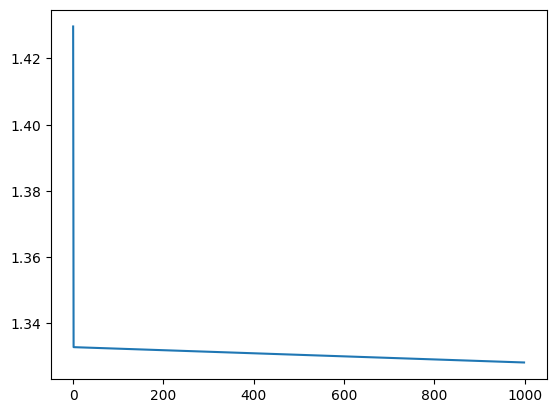

In [8]:
#graphing out graident descent to check if it is working properly.
w_graph, b_graph, c = gd(w, b, x_train, y_train, 0.3, costfunc, g, 10000)
c_iters = np.arange(len(c))
#print(c_iters)
plt.plot(c_iters, c)

In [9]:
print(myformula(x_train[0], w_graph, b_graph))

5.997744393228359
